<a href="https://colab.research.google.com/github/tamdoancong/5215-MachineLearning-Doan/blob/master/TamDoan_featureAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Feature Analysis

In [ ]:
!wget -O data.zip https://drive.google.com/u/0/uc?id=1DEMhy3x7ws8Eyv0VGzJNFeYkuXhFDXhC&export=download
!unzip -o data.zip 

--2020-09-25 04:29:23--  https://drive.google.com/u/0/uc?id=1DEMhy3x7ws8Eyv0VGzJNFeYkuXhFDXhC
Resolving drive.google.com (drive.google.com)... 173.194.79.113, 173.194.79.102, 173.194.79.101, ...
Connecting to drive.google.com (drive.google.com)|173.194.79.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-00-4g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/9uo5167pqtg9tnth2gmul17hrlgi781f/1601008125000/04063593624032689852/*/1DEMhy3x7ws8Eyv0VGzJNFeYkuXhFDXhC [following]
--2020-09-25 04:29:24--  https://doc-00-4g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/9uo5167pqtg9tnth2gmul17hrlgi781f/1601008125000/04063593624032689852/*/1DEMhy3x7ws8Eyv0VGzJNFeYkuXhFDXhC
Resolving doc-00-4g-docs.googleusercontent.com (doc-00-4g-docs.googleusercontent.com)... 108.177.119.132, 2a00:1450:4013:c00::84
Connecting to doc-00-4g-docs.googleusercontent.com (doc-00-4g-docs.googleusercontent.com)|1

In [ ]:
#import the libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

6/Feature Analysis

In [ ]:
# load the subject_split datasets
training=pd.read_csv("./data/subject_split/train.csv")
training

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,29,78,0,43.390,25.667,31.734,0.00348,0.000022,0.00152,0.00177,0.00457,0.03651,0.388,0.01632,0.02150,0.03624,0.04897,0.008005,24.885,0.38029,0.62114,0.18399
1,23,59,1,23.449,12.718,21.914,0.00563,0.000030,0.00287,0.00292,0.00862,0.03186,0.283,0.01562,0.02046,0.02887,0.04687,0.011275,21.013,0.45259,0.72558,0.14219
2,5,75,0,84.392,31.000,41.752,0.00354,0.000028,0.00168,0.00219,0.00503,0.03045,0.281,0.01594,0.01871,0.02651,0.04781,0.013284,22.085,0.56362,0.59660,0.18287
3,19,55,0,103.850,18.000,26.781,0.00602,0.000046,0.00208,0.00233,0.00624,0.01902,0.168,0.00894,0.01041,0.01606,0.02682,0.011945,22.663,0.63037,0.69406,0.26387
4,38,67,0,140.880,19.982,27.473,0.00414,0.000022,0.00183,0.00233,0.00550,0.03073,0.272,0.01636,0.02040,0.02387,0.04909,0.014141,21.436,0.55022,0.57203,0.26542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2800,5,75,0,42.406,31.000,40.383,0.00371,0.000031,0.00147,0.00207,0.00440,0.03158,0.274,0.01667,0.01827,0.02287,0.05000,0.013616,20.865,0.52891,0.62243,0.20829
2801,38,67,0,42.896,19.414,25.828,0.00588,0.000034,0.00306,0.00346,0.00918,0.03288,0.314,0.01684,0.01923,0.02618,0.05053,0.021522,20.162,0.57128,0.62273,0.26681
2802,21,73,0,123.830,29.217,39.480,0.00398,0.000033,0.00199,0.00218,0.00598,0.03541,0.309,0.01967,0.01998,0.02526,0.05902,0.011939,22.404,0.44357,0.62159,0.16353
2803,7,72,0,119.300,16.416,23.099,0.00536,0.000049,0.00214,0.00292,0.00643,0.03332,0.298,0.01681,0.02000,0.02854,0.05043,0.035802,21.462,0.57086,0.56998,0.23169


In [ ]:
training_target=training['total_UPDRS']

In [ ]:
tuning=pd.read_csv("./data/subject_split/dev.csv")
tuning


,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,6,63,0,124.3400,27.482,42.2220,0.00747,0.000052,0.00440,0.00423,0.01319,0.08700,0.765,0.04757,0.05336,0.06483,0.14272,0.028651,18.697,0.48090,0.70231,0.243810
1,6,63,0,159.3400,29.037,44.5560,0.00482,0.000037,0.00233,0.00242,0.00698,0.04564,0.431,0.02336,0.02980,0.03640,0.07009,0.023922,21.714,0.52553,0.64583,0.227670
2,15,65,0,117.5200,15.000,20.6670,0.00209,0.000012,0.00066,0.00088,0.00199,0.01176,0.105,0.00529,0.00615,0.00919,0.01586,0.009900,29.605,0.41836,0.53587,0.120140
3,18,65,0,4.3625,6.000,7.9555,0.00218,0.000016,0.00091,0.00112,0.00274,0.01545,0.134,0.00802,0.00948,0.01404,0.02406,0.003204,27.909,0.32235,0.62499,0.117190
4,15,65,0,166.6600,15.000,21.9030,0.00169,0.000009,0.00068,0.00074,0.00204,0.00941,0.096,0.00409,0.00478,0.00709,0.01228,0.003407,31.096,0.42936,0.55502,0.077124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,6,63,0,117.3300,27.170,41.7550,0.00493,0.000033,0.00244,0.00238,0.00733,0.02226,0.216,0.01143,0.01379,0.01985,0.03429,0.024797,23.526,0.39939,0.64157,0.158100
1093,11,55,0,49.4560,20.028,23.0370,0.00431,0.000035,0.00213,0.00249,0.00639,0.02189,0.191,0.01062,0.01369,0.02118,0.03186,0.023079,23.929,0.47948,0.67020,0.170330
1094,15,65,0,194.5500,15.000,22.6050,0.00280,0.000017,0.00119,0.00127,0.00357,0.01277,0.129,0.00576,0.00627,0.00987,0.01727,0.010317,28.281,0.41086,0.54318,0.092377
1095,33,66,1,79.4440,25.763,30.4540,0.00804,0.000030,0.00434,0.00509,0.01302,0.07331,0.638,0.04016,0.04703,0.05537,0.12048,0.050660,15.060,0.49334,0.56824,0.320830


In [ ]:
tuning_target=tuning['total_UPDRS']

In [ ]:
training.corr(method='pearson')

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
subject#,1.000000,0.027960,-0.032007,0.025592,0.356253,0.406931,0.090320,0.043458,0.067958,0.067378,0.067974,-0.023290,-0.020140,-0.075555,-0.047286,0.045982,-0.075557,0.049374,0.017956,-0.019931,0.147730,0.108943
age,0.027960,1.000000,0.023626,0.029435,0.309776,0.276988,-0.039004,0.017727,-0.066108,-0.029155,-0.066115,0.259778,0.261589,0.225181,0.278408,0.327888,0.225177,0.038932,-0.224369,0.171367,-0.130992,0.133359
sex,-0.032007,0.023626,1.000000,-0.000105,-0.101315,-0.130545,-0.077923,-0.247456,-0.010759,-0.067389,-0.010766,-0.186183,-0.201227,-0.160954,-0.192124,-0.214446,-0.160951,-0.119367,0.163961,-0.232204,0.011768,-0.273822
test_time,0.025592,0.029435,-0.000105,1.000000,0.042733,0.039251,-0.000859,0.000588,-0.012959,-0.008404,-0.012942,-0.032330,-0.022651,-0.022694,-0.039709,-0.037969,-0.022689,-0.043042,0.076107,-0.106412,0.057446,0.018082
motor_UPDRS,0.356253,0.309776,-0.101315,0.042733,1.000000,0.911619,0.014395,-0.006334,0.008541,0.028600,0.008559,0.022919,0.030537,-0.013737,0.021140,0.078379,-0.013738,-0.002159,0.009963,-0.008345,0.032054,0.060413
total_UPDRS,0.406931,0.276988,-0.130545,0.039251,0.911619,1.000000,-0.007983,-0.000677,-0.004980,0.005971,-0.004967,0.010847,0.015421,-0.013880,0.008723,0.044478,-0.013881,0.005981,-0.012675,0.029307,-0.032152,0.050585
Jitter(%),0.090320,-0.039004,-0.077923,-0.000859,0.014395,-0.007983,1.000000,0.828059,0.979230,0.963016,0.979232,0.574287,0.588609,0.496534,0.527937,0.543947,0.496531,0.816104,-0.605741,0.317502,0.380905,0.696603
Jitter(Abs),0.043458,0.017727,-0.247456,0.000588,-0.006334,-0.000677,0.828059,1.000000,0.779950,0.709042,0.779951,0.561656,0.574736,0.519536,0.504482,0.485263,0.519534,0.767042,-0.681046,0.457371,0.380669,0.760562
Jitter:RAP,0.067958,-0.066108,-0.010759,-0.012959,0.008541,-0.004980,0.979230,0.779950,1.000000,0.953335,0.999999,0.558337,0.565551,0.500558,0.505680,0.497960,0.500554,0.816490,-0.562545,0.265595,0.326786,0.608846
Jitter:PPQ5,0.067378,-0.029155,-0.067389,-0.008404,0.028600,0.005971,0.963016,0.709042,0.953335,1.000000,0.953343,0.560277,0.571674,0.470588,0.535818,0.568113,0.470584,0.752221,-0.580432,0.277816,0.372300,0.649887


In [ ]:
training.corr(method='pearson')["total_UPDRS"].sort_values()

sex             -0.130545
DFA             -0.032152
Shimmer:DDA     -0.013881
Shimmer:APQ3    -0.013880
HNR             -0.012675
Jitter(%)       -0.007983
Jitter:RAP      -0.004980
Jitter:DDP      -0.004967
Jitter(Abs)     -0.000677
Jitter:PPQ5      0.005971
NHR              0.005981
Shimmer:APQ5     0.008723
Shimmer          0.010847
Shimmer(dB)      0.015421
RPDE             0.029307
test_time        0.039251
Shimmer:APQ11    0.044478
PPE              0.050585
age              0.276988
subject#         0.406931
motor_UPDRS      0.911619
total_UPDRS      1.000000
Name: total_UPDRS, dtype: float64

In [ ]:
x=training['motor_UPDRS'].to_numpy()
y=training['total_UPDRS'].to_numpy()

In [ ]:
m=np.corrcoef(x, y)
m.shape
m

array([[1.       , 0.9116186],
       [0.9116186, 1.       ]])

In [ ]:
#reference code from Joshua Higginbotham

import pandas as pd
import numpy as np
import sklearn as sk
import sklearn.linear_model as sklm
import sklearn.metrics as skmet

def trainLR(examples, targets):
  reg = sklm.LinearRegression()
  reg.fit(examples, targets)
  return reg

def evaLR(reg, examples, targets):
  y_pred = reg.predict(examples)
  mse = skmet.mean_squared_error(y_pred, targets)
  rmse = np.sqrt(mse)
  r2 = reg.score(examples, targets)
  return {
      "score": r2,
      "rmse": rmse,
      "intercept": reg.intercept_,
      "coef": reg.coef_
  }

rainmodel = trainLR(training, training_target)
evamodel = evaLR(reg, tuning, tuning_target)
evamodel['score']



1.0

In [ ]:
x=x.reshape(-1, 1) 
y=y.reshape(-1, 1) 

In [ ]:
train_motor=trainLR(x,y)


In [ ]:
x_tuning=tuning['motor_UPDRS'].to_numpy()
y_tuning=tuning['total_UPDRS'].to_numpy()

In [ ]:
x_tuning=x_tuning.reshape(-1,1)
y_tuning=y_tuning.reshape(-1,1)
y_tuning

array([[42.222],
       [44.556],
       [20.667],
       ...,
       [22.605],
       [30.454],
       [16.768]])

In [ ]:
train_motor.score(x_tuning,y_tuning)

0.906307390581817

In [ ]:
def array(a):
  b=None
  b=a.to_numpy()
  b=a.reshape(-1,1)
  return b

In [ ]:
x_Jitter=training['Jitter(%)'].to_numpy()
x_Jitter=x_Jitter.reshape(-1,1)
#array(x_Jitter)

In [ ]:
train_jitter=trainLR(x_Jitter,y)

In [ ]:
x_tuning_jitter=tuning['Jitter(%)'].to_numpy()
x_tuning_jitter=x_tuning_jitter.reshape(-1,1)

In [ ]:
train_jitter.score(x_tuning_jitter,y_tuning)

-1.114653357226211

In [ ]:
x_JitterA=training['Jitter(Abs)'].to_numpy()
x_JitterA=x_JitterA.reshape(-1,1)

In [ ]:
x_tuning_jitterA=tuning['Jitter(Abs)'].to_numpy()
x_tuning_jitterA=x_tuning_jitter.reshape(-1,1)

In [ ]:
train_jitterA=trainLR(x_JitterA,y)
train_jitterA.score(x_tuning_jitterA,y_tuning)

-0.9298280755595942

In [ ]:
trainingdropJitterA=training.drop(columns=['Jitter(Abs)'])
tuningdropJitterA=tuning.drop(columns=['Jitter(Abs)'])

In [ ]:
trainingdropJitterA

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,29,78,0,43.390,25.667,31.734,0.00348,0.00152,0.00177,0.00457,0.03651,0.388,0.01632,0.02150,0.03624,0.04897,0.008005,24.885,0.38029,0.62114,0.18399
1,23,59,1,23.449,12.718,21.914,0.00563,0.00287,0.00292,0.00862,0.03186,0.283,0.01562,0.02046,0.02887,0.04687,0.011275,21.013,0.45259,0.72558,0.14219
2,5,75,0,84.392,31.000,41.752,0.00354,0.00168,0.00219,0.00503,0.03045,0.281,0.01594,0.01871,0.02651,0.04781,0.013284,22.085,0.56362,0.59660,0.18287
3,19,55,0,103.850,18.000,26.781,0.00602,0.00208,0.00233,0.00624,0.01902,0.168,0.00894,0.01041,0.01606,0.02682,0.011945,22.663,0.63037,0.69406,0.26387
4,38,67,0,140.880,19.982,27.473,0.00414,0.00183,0.00233,0.00550,0.03073,0.272,0.01636,0.02040,0.02387,0.04909,0.014141,21.436,0.55022,0.57203,0.26542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2800,5,75,0,42.406,31.000,40.383,0.00371,0.00147,0.00207,0.00440,0.03158,0.274,0.01667,0.01827,0.02287,0.05000,0.013616,20.865,0.52891,0.62243,0.20829
2801,38,67,0,42.896,19.414,25.828,0.00588,0.00306,0.00346,0.00918,0.03288,0.314,0.01684,0.01923,0.02618,0.05053,0.021522,20.162,0.57128,0.62273,0.26681
2802,21,73,0,123.830,29.217,39.480,0.00398,0.00199,0.00218,0.00598,0.03541,0.309,0.01967,0.01998,0.02526,0.05902,0.011939,22.404,0.44357,0.62159,0.16353
2803,7,72,0,119.300,16.416,23.099,0.00536,0.00214,0.00292,0.00643,0.03332,0.298,0.01681,0.02000,0.02854,0.05043,0.035802,21.462,0.57086,0.56998,0.23169


In [ ]:
trainmodelwithoutjitterA=trainLR(trainingdropJitterA,y)
trainmodelwithoutjitterA.score(tuningdropJitterA,y_tuning)

1.0

In [ ]:
trainingdropJitterpercent=training.drop(columns=['Jitter(%)'])
tuningdropJitterpercent=tuning.drop(columns=['Jitter(%)'])

In [ ]:
trainmodelwithoutjitterpercent=trainLR(trainingdropJitterpercent,y)
trainmodelwithoutjitterpercent.score(tuningdropJitterpercent,y_tuning)

1.0

In [ ]:
trainingModelwithoutTimeAgeGender=training.drop(columns=['test_time','age','sex'])
trainingwithoutTimeAgeGender


,subject#,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,29,25.667,31.734,0.00348,0.000022,0.00152,0.00177,0.00457,0.03651,0.388,0.01632,0.02150,0.03624,0.04897,0.008005,24.885,0.38029,0.62114,0.18399
1,23,12.718,21.914,0.00563,0.000030,0.00287,0.00292,0.00862,0.03186,0.283,0.01562,0.02046,0.02887,0.04687,0.011275,21.013,0.45259,0.72558,0.14219
2,5,31.000,41.752,0.00354,0.000028,0.00168,0.00219,0.00503,0.03045,0.281,0.01594,0.01871,0.02651,0.04781,0.013284,22.085,0.56362,0.59660,0.18287
3,19,18.000,26.781,0.00602,0.000046,0.00208,0.00233,0.00624,0.01902,0.168,0.00894,0.01041,0.01606,0.02682,0.011945,22.663,0.63037,0.69406,0.26387
4,38,19.982,27.473,0.00414,0.000022,0.00183,0.00233,0.00550,0.03073,0.272,0.01636,0.02040,0.02387,0.04909,0.014141,21.436,0.55022,0.57203,0.26542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2800,5,31.000,40.383,0.00371,0.000031,0.00147,0.00207,0.00440,0.03158,0.274,0.01667,0.01827,0.02287,0.05000,0.013616,20.865,0.52891,0.62243,0.20829
2801,38,19.414,25.828,0.00588,0.000034,0.00306,0.00346,0.00918,0.03288,0.314,0.01684,0.01923,0.02618,0.05053,0.021522,20.162,0.57128,0.62273,0.26681
2802,21,29.217,39.480,0.00398,0.000033,0.00199,0.00218,0.00598,0.03541,0.309,0.01967,0.01998,0.02526,0.05902,0.011939,22.404,0.44357,0.62159,0.16353
2803,7,16.416,23.099,0.00536,0.000049,0.00214,0.00292,0.00643,0.03332,0.298,0.01681,0.02000,0.02854,0.05043,0.035802,21.462,0.57086,0.56998,0.23169


In [ ]:
tuningwithoutTimeAgeGender=tuning.drop(columns=['test_time','age','sex'])
tuningwithoutTimeAgeGender

,subject#,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,6,27.482,42.2220,0.00747,0.000052,0.00440,0.00423,0.01319,0.08700,0.765,0.04757,0.05336,0.06483,0.14272,0.028651,18.697,0.48090,0.70231,0.243810
1,6,29.037,44.5560,0.00482,0.000037,0.00233,0.00242,0.00698,0.04564,0.431,0.02336,0.02980,0.03640,0.07009,0.023922,21.714,0.52553,0.64583,0.227670
2,15,15.000,20.6670,0.00209,0.000012,0.00066,0.00088,0.00199,0.01176,0.105,0.00529,0.00615,0.00919,0.01586,0.009900,29.605,0.41836,0.53587,0.120140
3,18,6.000,7.9555,0.00218,0.000016,0.00091,0.00112,0.00274,0.01545,0.134,0.00802,0.00948,0.01404,0.02406,0.003204,27.909,0.32235,0.62499,0.117190
4,15,15.000,21.9030,0.00169,0.000009,0.00068,0.00074,0.00204,0.00941,0.096,0.00409,0.00478,0.00709,0.01228,0.003407,31.096,0.42936,0.55502,0.077124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,6,27.170,41.7550,0.00493,0.000033,0.00244,0.00238,0.00733,0.02226,0.216,0.01143,0.01379,0.01985,0.03429,0.024797,23.526,0.39939,0.64157,0.158100
1093,11,20.028,23.0370,0.00431,0.000035,0.00213,0.00249,0.00639,0.02189,0.191,0.01062,0.01369,0.02118,0.03186,0.023079,23.929,0.47948,0.67020,0.170330
1094,15,15.000,22.6050,0.00280,0.000017,0.00119,0.00127,0.00357,0.01277,0.129,0.00576,0.00627,0.00987,0.01727,0.010317,28.281,0.41086,0.54318,0.092377
1095,33,25.763,30.4540,0.00804,0.000030,0.00434,0.00509,0.01302,0.07331,0.638,0.04016,0.04703,0.05537,0.12048,0.050660,15.060,0.49334,0.56824,0.320830


In [ ]:
trainingModelwithoutTimeAgeGender=trainLR(trainingwithoutTimeAgeGender,y)
trainingModelwithoutTimeAgeGender.score(tuningwithoutTimeAgeGender,y_tuning)

1.0

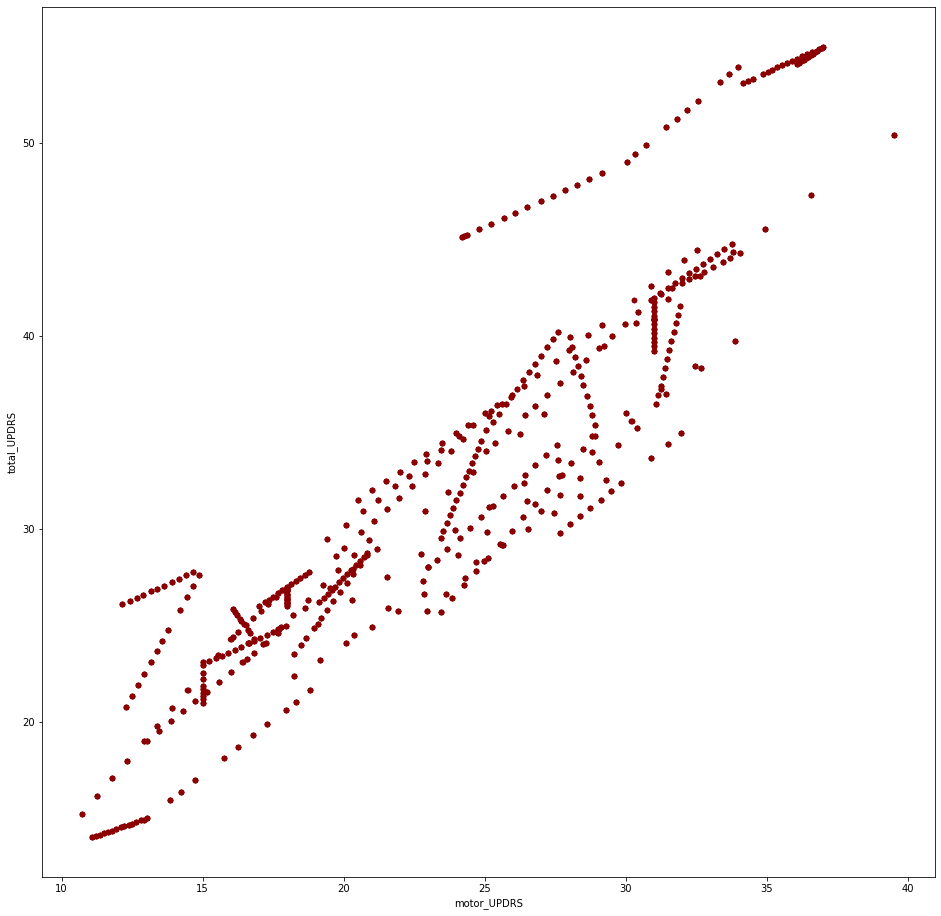

In [ ]:
training.plot.scatter(x='motor_UPDRS',
                      y='total_UPDRS',
                      c='DarkRed',
                   figsize=(16, 16))

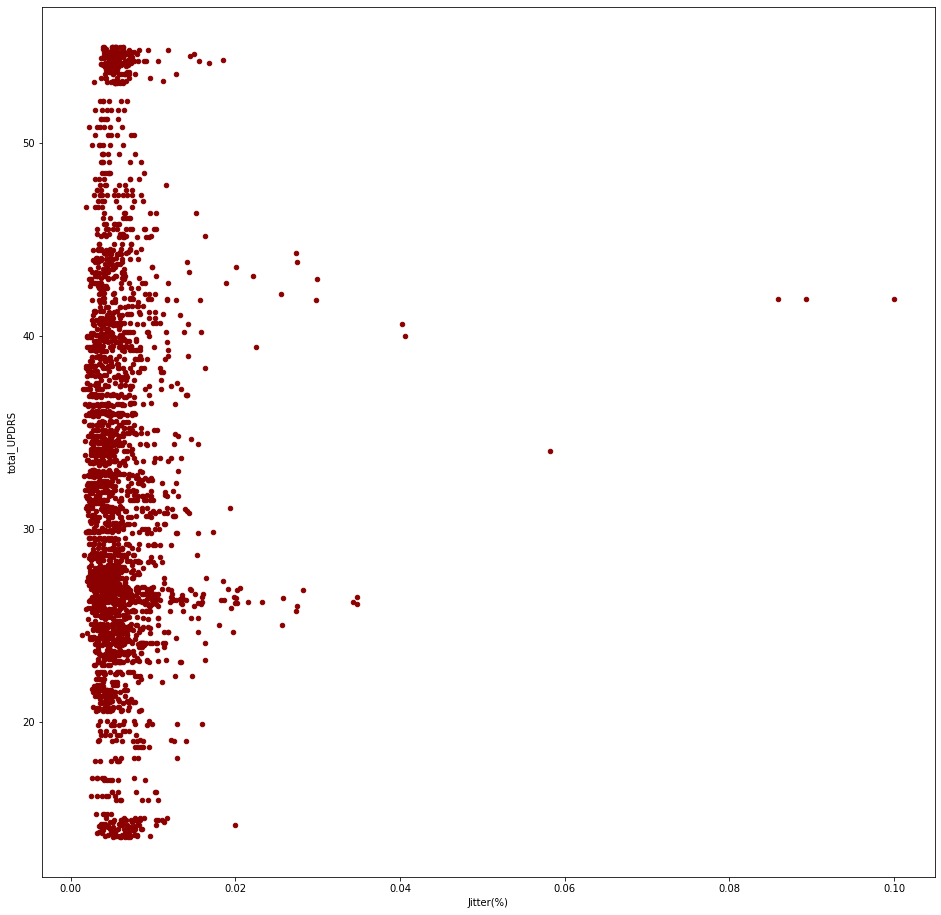

In [ ]:
training.plot.scatter(x='Jitter(%)',
                      y='total_UPDRS',
                      c='DarkRed',
                   figsize=(16, 16))

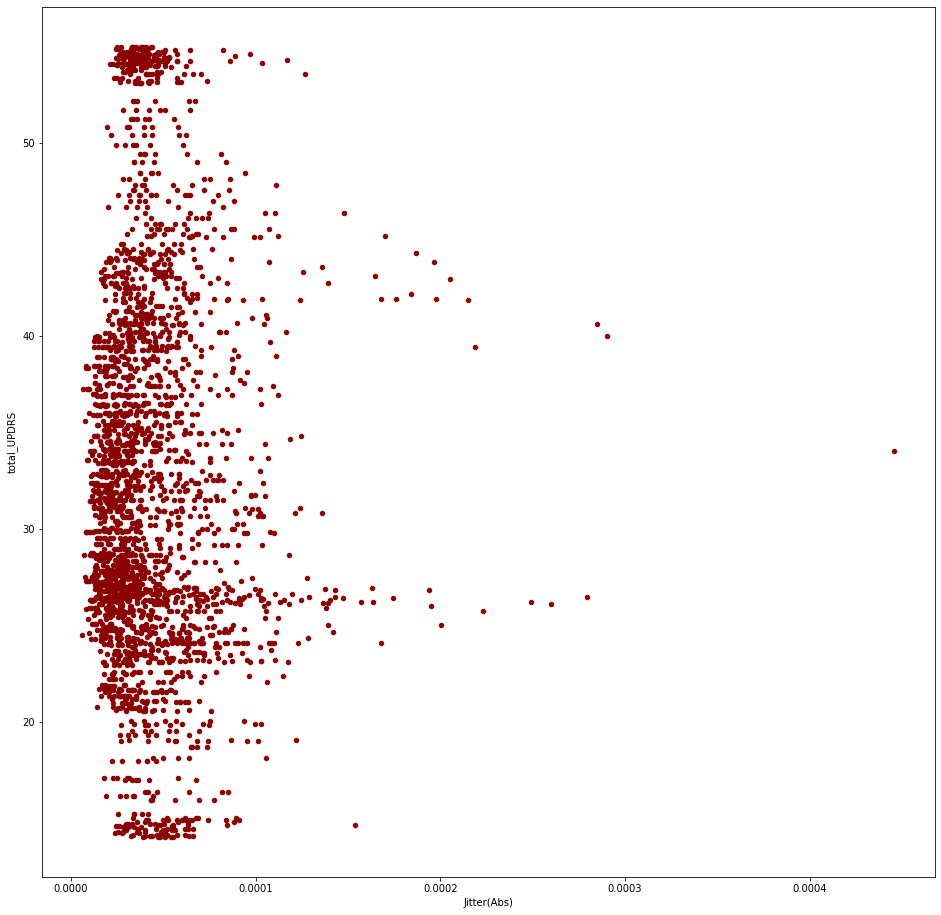

In [ ]:
training.plot.scatter(x='Jitter(Abs)',
                      y='total_UPDRS',
                      c='DarkRed',
                   figsize=(16, 16))

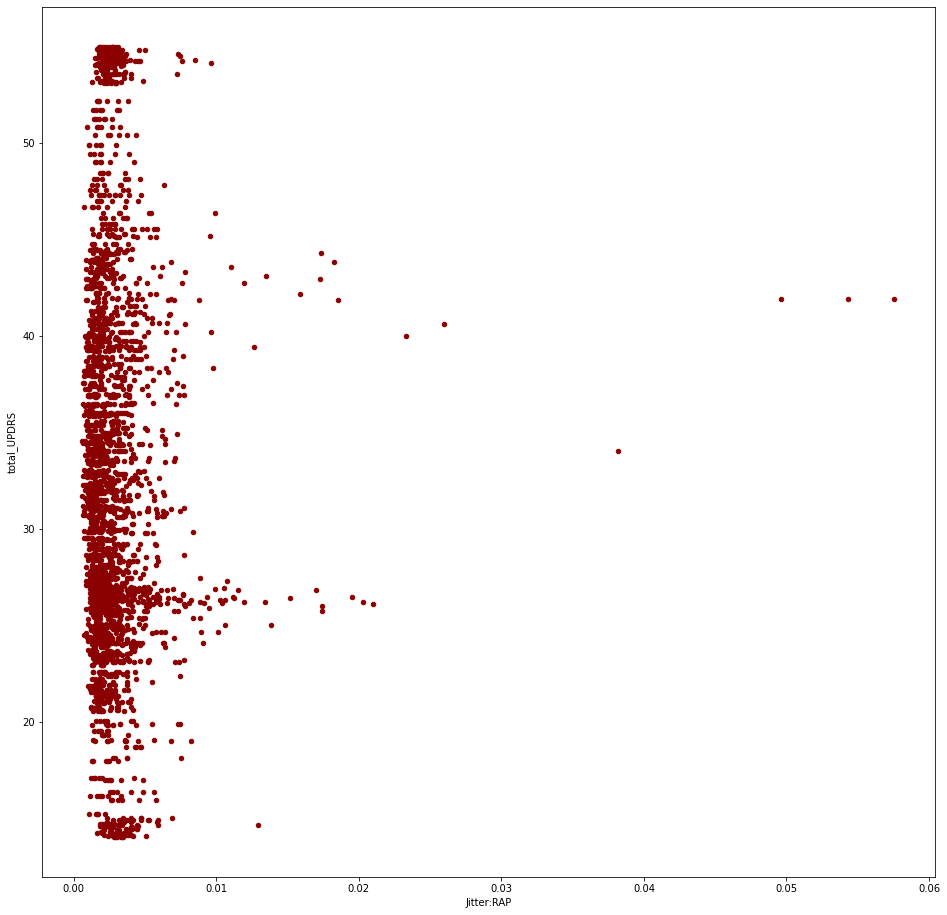

In [ ]:
training.plot.scatter(x='Jitter:RAP',
                      y='total_UPDRS',
                      c='DarkRed',
                   figsize=(16, 16))

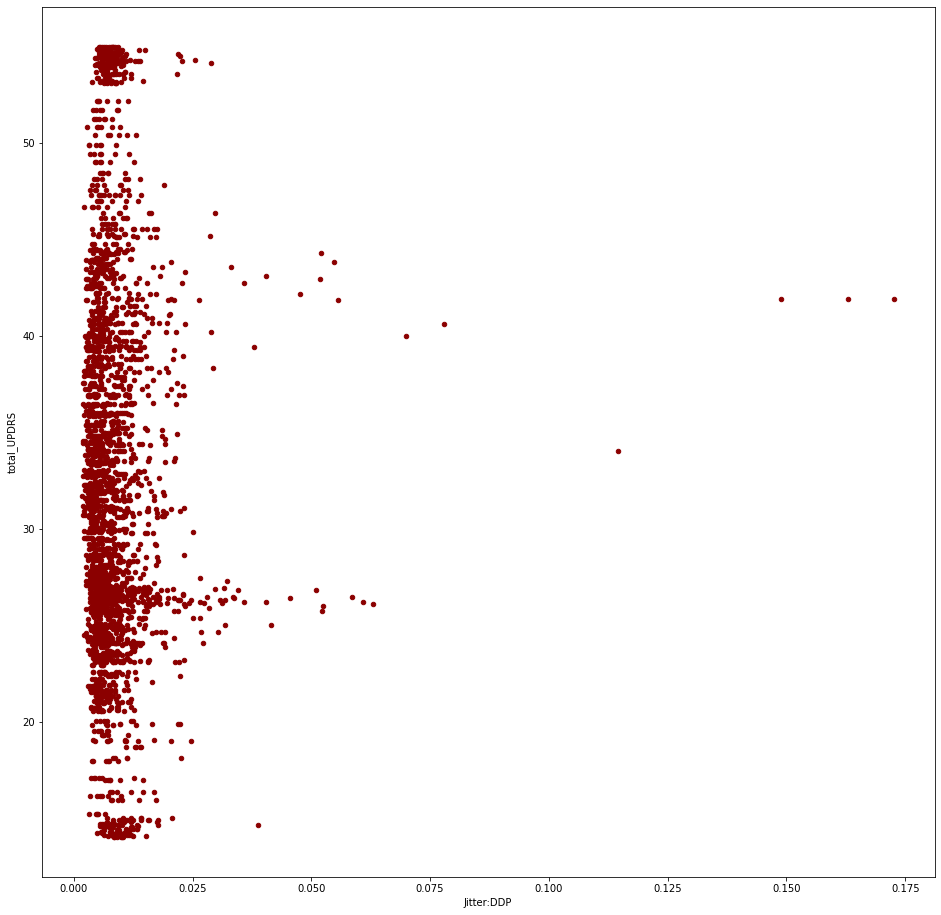

In [ ]:
training.plot.scatter(x='Jitter:DDP',
                      y='total_UPDRS',
                      c='DarkRed',
                   figsize=(16, 16))